In [289]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [290]:
shark = pd.read_csv('../Sharks-Attack/Input/sharks.csv') 
shark

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6,NaN,NaN
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5,NaN,NaN
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,NaN,NaN
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,NaN,NaN


In [291]:
#In this cell I saw the null values of the different columns of the database
null_colls = shark.isnull().sum()
null_colls[null_colls>1]

Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
href                         3
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [292]:
#I drop the columns that have more than 5900 null values because I guess that are not very useful
drop_cols = list(null_colls[null_colls > 5900].index)

In [293]:
shark = shark.drop(drop_cols, axis =1)

In [294]:
shark.dtypes

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
dtype: object

In [295]:
#I changed the name of the columns Species, Sex and Fatal(Y/N) to another more comfortable names to deal with
shark.rename(columns={'Species ': 'Species', 'Sex ': 'Sex', 'Fatal (Y/N)':'Fatal'}, inplace=True)
shark.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [296]:
shark['Species'].value_counts()

White shark                        161
Shark involvement not confirmed     80
Tiger shark                         68
Bull shark                          52
6' shark                            40
                                  ... 
Oceanic whitetip shark, 7'           1
Blacktip shark, 5' to 6'             1
Nurse shark, 3'                      1
16' white shark                      1
2.1 to 2.4 m [7' to 8'] shark        1
Name: Species, Length: 1538, dtype: int64

In [297]:
#I saw that the second most frequent value in the Species column was that the shark involvement was not confirmed so I deleted all the rows with that value
shark = shark.loc[(shark['Species'] != "Shark involvement not confirmed")]
shark['Species'].value_counts()

White shark                      161
Tiger shark                       68
Bull shark                        52
6' shark                          40
4' shark                          39
                                ... 
Oceanic whitetip shark, 7'         1
Blacktip shark, 5' to 6'           1
Nurse shark, 3'                    1
16' white shark                    1
2.1 to 2.4 m [7' to 8'] shark      1
Name: Species, Length: 1537, dtype: int64

In [298]:
#Here I dropped all the columns that I thought didn't give me value to my research
coleliminar = ['Date', 'Area', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Time', 'Species', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1','Case Number.2', 'original order']
shark = shark.drop(coleliminar, axis=1)

In [299]:
shark.columns

Index(['Case Number', 'Year', 'Type', 'Country', 'Fatal'], dtype='object')

In [300]:
print(set(shark['Year']))

{0, 5, 1543, 1554, 1555, 1580, 1595, 77, 1617, 1637, 1638, 1642, 1700, 1703, 1721, 1733, 1738, 1742, 1748, 1749, 1755, 1758, 1764, 1767, 1771, 1776, 1779, 1785, 1787, 1788, 1791, 1800, 1803, 1804, 1805, 1807, 1811, 1812, 1816, 1817, 1818, 1819, 1822, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1834, 1835, 1836, 1837, 1839, 1840, 1841, 1842, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,

In [301]:
#Here I selected the attacks registered in the last 100 years of the database
shark = shark.loc[(shark['Year'] > 1916)]

In [302]:
shark['Fatal'].value_counts()

N          3858
Y          1043
UNKNOWN      66
 N            7
F             1
Name: Fatal, dtype: int64

In [303]:
#Here I selected the values for Yes or No in the Fatal column
shark = shark.loc[(shark['Fatal'] == 'Y') | (shark['Fatal'] == 'N')]


In [304]:
# In this cells I tried to optimize the values of the Type column. 
# I guessed that the boat or boating value was provoked as the humans were in the shark territory and I suppose that the shark attacks when is threatened
# Sea disaster I thought it was unprovoked
shark['Type'].value_counts()

Unprovoked      3647
Provoked         497
Invalid          324
Boat             190
Sea Disaster     165
Boating           78
Name: Type, dtype: int64

In [305]:
shark = shark.loc[(shark['Type'] != 'Invalid')]

In [306]:
shark.Type = shark.Type.replace(['Boat', 'Boating'], 'Provoked')

In [307]:
shark.Type = shark.Type.replace('Sea Disaster', 'Unprovoked')

In [308]:
shark['Type'].value_counts()

Unprovoked    3812
Provoked       765
Name: Type, dtype: int64

In [309]:
shark['Country'].value_counts()

USA                 1734
AUSTRALIA            945
SOUTH AFRICA         464
PAPUA NEW GUINEA     124
BRAZIL                90
                    ... 
LIBYA                  1
THE BALKANS            1
ARGENTINA              1
NIGERIA                1
DIEGO GARCIA           1
Name: Country, Length: 162, dtype: int64

In [310]:
#In this column I selected the values of the Country column related to the top 5 registered shark attacks countries.
shark = shark.loc[(shark['Country'] == 'USA') | (shark['Country'] == 'AUSTRALIA') | (shark['Country'] == 'SOUTH AFRICA') | (shark['Country'] == 'PAPUA NEW GUINEA') | (shark['Country'] == 'BRAZIL')]

In [311]:
#Here I created a new column where I assigned categorized values for the Year column divided by periods of 20 years each value.
#At this time I realized that the majority of the values were registered in the last 20 years.
cutoffs = [1916,1936,1956,1976,1996,2016]
year_labels = ['1917-1936', '1937-1956', '1957-1976','1977-1996','1997-2016']
shark['Period'] = pd.cut(shark['Year'], cutoffs, labels = year_labels)
shark['Period'].value_counts()

1997-2016    1472
1977-1996     630
1957-1976     611
1937-1956     355
1917-1936     289
Name: Period, dtype: int64

In [312]:
select_columns = ['Case Number','Year', 'Type', 'Country', 'Fatal', 'Period']
before = len(shark)
shark = shark[select_columns].drop_duplicates()
after = len(shark)
print('Number of duplicated records dropped: ', str(before-after))


Number of duplicated records dropped:  4


In [261]:
periodo = shark['Period'].value_counts()
index = year_labels
sharkdf = pd.DataFrame({'Nº attacks':periodo}, index=index)

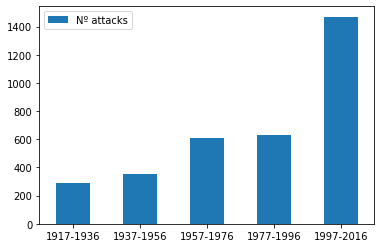

In [268]:
ax = sharkdf.plot.bar(rot=0)

In [313]:
sharky = shark.loc[(shark['Year'] > 1990)]

In [317]:
sharky['Year'].value_counts().sort_index()

1991     31
1992     34
1993     33
1994     44
1995     54
1996     44
1997     43
1998     53
1999     45
2000     73
2001     71
2002     75
2003     72
2004     64
2005     74
2006     78
2007     82
2008     81
2009     76
2010     64
2011     77
2012     90
2013     83
2014     93
2015    103
2016     73
Name: Year, dtype: int64

In [319]:
cutoffs1 = [1990,1995,2000,2005,2010,2016]
lustros = ['1991-1995','1996-2000','2001-2005','2006-2010','2011-2016']
sharky['Lustro'] = pd.cut(shark['Year'], cutoffs1, labels=lustros)
sharky['Lustro'].value_counts()

/home/joaquin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


2011-2016    519
2006-2010    381
2001-2005    356
1996-2000    258
1991-1995    196
Name: Lustro, dtype: int64

In [320]:
elim = sharky[['Case Number', 'Year','Period']]
sharky = sharky.drop(elim, axis=1)

In [321]:
period = sharky.groupby(['Lustro', 'Type', 'Fatal']).count().fillna(0)
period

Country
Lustro    Type       Fatal         
1991-1995 Provoked   N         18.0
                     Y          0.0
          Unprovoked N        153.0
                     Y         25.0
1996-2000 Provoked   N         21.0
                     Y          0.0
          Unprovoked N        215.0
                     Y         22.0
2001-2005 Provoked   N         35.0
                     Y          1.0
          Unprovoked N        290.0
                     Y         30.0
2006-2010 Provoked   N         50.0
                     Y          1.0
          Unprovoked N        310.0
                     Y         20.0
2011-2016 Provoked   N         64.0
                     Y          0.0
          Unprovoked N        423.0
                     Y         32.0

In [322]:
sharky.to_csv('shark_output.csv')

In [276]:
sharkUSA = shark.loc[(shark['Country'] == 'USA')]
sharkAUS = shark.loc[(shark['Country'] == 'AUSTRALIA')]
sharkSA = shark.loc[(shark['Country'] == 'SOUTH AFRICA')]
sharkPNG = shark.loc[(shark['Country'] == 'PAPUA NEW GUINEA')]
sharkBRZ = shark.loc[(shark['Country'] == 'BRAZIL')]

In [277]:
elimusa = sharkUSA[['Country']]
sharkUSA = sharkUSA.drop(elimusa, axis = 1)

In [286]:
usa = sharkUSA['Period'].value_counts()
sharkusa = pd.DataFrame({'Nº attacks':usa}, index=index)

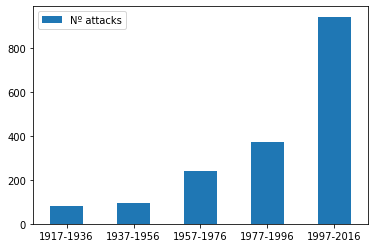

In [287]:
axusa = sharkusa.plot.bar(rot=0)